# <center>Lecture 3: Numerical Optimization</center>
## <center>Antoine Chapel (Sciences Po & PSE) </center>
## <center>Alfred Galichon's [math+econ+code](https://www.math-econ-code.org/) prerequisite class on numerical optimization and econometrics, in Python </center>
Class content by Antoine Chapel. Past and present support from Alfred Galichon's ERC grant CoG-866274 is acknowledged, as well as inputs from contributors listed [here](https://www.math-econ-code.org/team). If you reuse material from this class, please cite as:

Antoine Chapel, 'math+econ+code' prerequisite class on numerical optimization and econometrics, January 2023
References: 
* Iterative Solution of Nonlinear Equations in Several Variables (Ortega Rheinboldt, 1970) (Great book but a bit inaccessible)
* Microeconometrics, methods and Applications Chapter 10 (Cameron Trivedi) (More accessible but focused on econometrics)


Numerical Optimization is a large and developed field, we cannot cover everything and even every type of method in two hours. Therefore we will simply introduce the topic, and focus on approximation methods for convex optimization and econometrics.

Why do we need numerical optimization ? Sometimes, analytical methods based on first and second-order conditions are not sufficient. The problem can be too large to be computed by hand in a human life, or simply it cannot be solved analytically. Numerical methods exist for many tasks (computing the inverse of a matrix, find the maximum of a function, find its solutions, etc.) We will explore some of them and code them by hand, but in many cases an optimized implementation of the algorithms we will describe exists in Python.

Speaking of algorithms, often several have been invented to solve the same problem, which differ in speed, efficiency...

## Concepts:

* Function: $f(x)$, $x \in \mathbb{R}^n$
* Gradient: $\nabla f(x_k) = \Big(\frac{\partial f}{\partial x_1} \Big|_{x_k}, \frac{\partial f}{\partial x_2} \Big|_{x_k}, ..., \frac{\partial f}{\partial x_n} \Big|_{x_k}\Big)$
* Search Direction: in what direction should we look for in order to find a better $x_k$ ?
* Step size: there is a trade-off between going fast with a large step, but risk missing the optimum, or use smaller steps but risk taking ages to find the solution
* And ending criteria: when is "close enough" good enough ?


In [1]:
def fconvex(x1, x2):
    return x1**(2) + x2**(2)

In [2]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.rcParams["figure.figsize"] = (20,15)

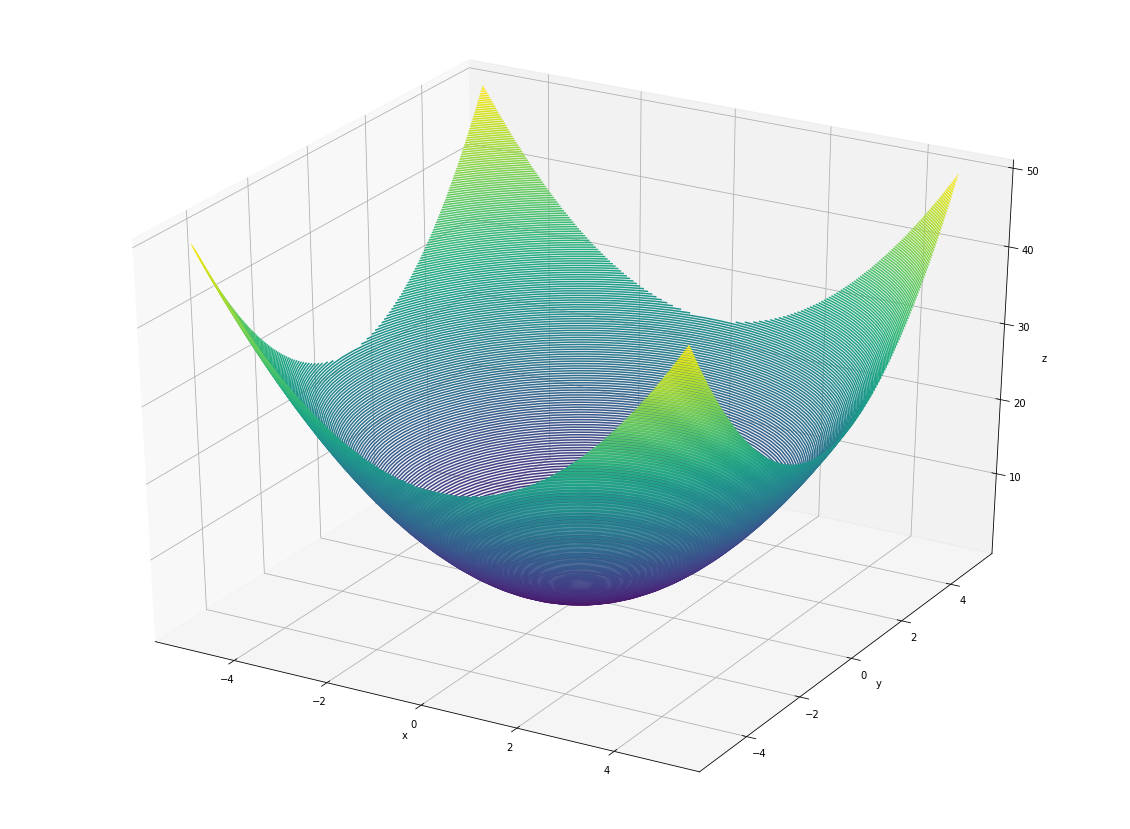

In [4]:
fig = plt.figure()
ax = plt.axes(projection='3d')
x = np.linspace(-5, 5, 30)
y = np.linspace(-5, 5, 30)
X, Y = np.meshgrid(x, y)
Z = fconvex(X, Y)

ax.contour3D(X, Y, Z, 200, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

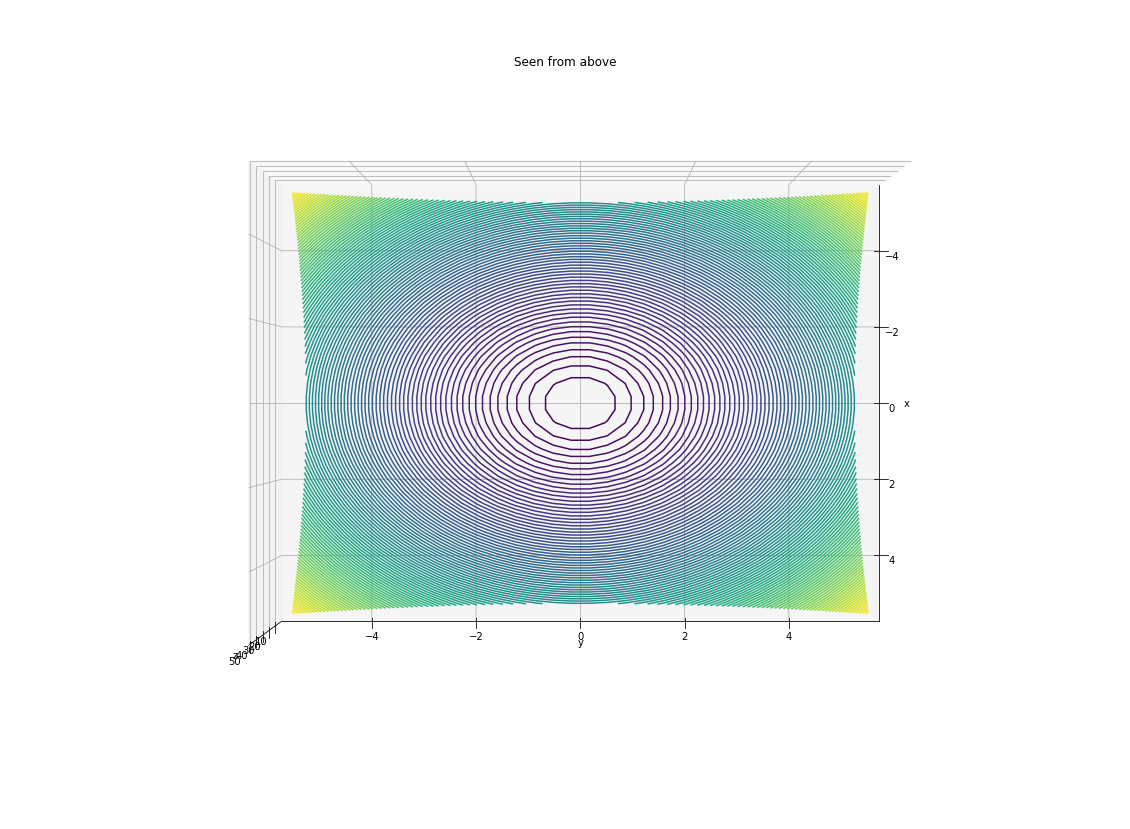

In [5]:
fig2 = plt.figure()
ax2 = plt.axes(projection='3d')
x = np.linspace(-5, 5, 30)
y = np.linspace(-5, 5, 30)
X, Y = np.meshgrid(x, y)
Z = fconvex(X, Y)

ax2.contour3D(X, Y, Z, 100, cmap='viridis')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.set_title('Seen from above');

ax2.view_init(90, 0)

## Gradient Descent

This first and import method can be used to find the optimum of a function. In its simplest version, it can be used on globally convex (or concave) functions such as the one depicted above.


<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Gradient_descent.svg/800px-Gradient_descent.svg.png width="200">


The conceptual formula for the Gradient Descent algorithm is the following:

\begin{align}
x_{k+1} = x_k + \lambda_k A_k g_k
\end{align}

Where:
* $g_k$ is the gradient of the function evaluated at $x_k: \nabla f(x) \Big|_{x_k}$. In case it is not clear, $g_k$ is a vector, of size $n$.
* $A_k$ is a (n x n) matrix that depends on $x_k$. If we use the Newton-Raphson method, this matrix is set to $A_k = -(H_k)^{-1}$, where $H$ is the Hessian that we studied in the first session.
* $\lambda_k$ is the size of the step we are taking

So, we need partial derivatives. How do we compute these ?
- Analytical solution: faster, but you need to be able to compute them with pen and paper
- Numerical solution: approximate the partial derivative: $\frac{\partial f}{\partial x_j} \approx \frac{f(x + h \cdot e_j) \hspace{2pt} - \hspace{2pt}  f(x - h \cdot e_j)}{2h}$, where $h$ is small (e.g $1e-5$) and $e_j = (0,..., 0, 1, 0, ..., 0)'$ is a vector of zeros with value 1 at the index of the partial derivative you are taking.

Let's go back to our function $f(x_1, x_2) = x_1^2 + x_2^2$, here the derivatives are extremely easy to compute by hand. We write them under matrix form (numpy array).

In [6]:
def f(x):
    return x[0]**(2) + x[1]**(2)

def g(x):
    return np.array([2*x[0], 2*x[1]])


def H(x):
    return np.array([[2, 0],
                    [0, 2]])

In [7]:
#Starting point: (25, 12)
λ = 0.2

x_k1 = np.array([25, 12])
g_k1 = g(x_k1)
A_k1 = -np.linalg.inv(H(x_k1))

print(g_k1)

[50 24]


In [8]:
x_k2 = x_k1 + λ* A_k1@g_k1

In [9]:
g(x_k2)

array([40. , 19.2])

In [10]:
# As you have seen, since the function is simple, H is the same for every iteration, we will not re-compute it.
g_k2 = g(x_k2)
x_k3 = x_k2 + λ* A_k1@g_k2

In [11]:
g(x_k3) #closer to 0, but still not there. Let's automatize this process

array([32.  , 15.36])

In [12]:
def gradient_descent(x_1, λ=0.5):
    error = 1000
    tol = 1e-8
    x_hist = []
    
    
    x = x_1
    while error > tol:
        g_k = g(x)
        A_k = -np.linalg.inv(H(x))
        x = x + λ*A_k@g_k
        x_hist.append(x)
        
        error = max(abs(g_k))
    
    x_hist_np = np.empty((len(x_hist), x_1.shape[0]))
    for iter_index in range(len(x_hist)):
        x_hist_np[iter_index, :] = x_hist[iter_index]
    return x, x_hist_np

In [13]:
sol = gradient_descent(np.array([4, 4]))[0]
sol

array([1.86264515e-09, 1.86264515e-09])

In [14]:
x_hist_1 = gradient_descent(np.array([-150, -150]))[1]

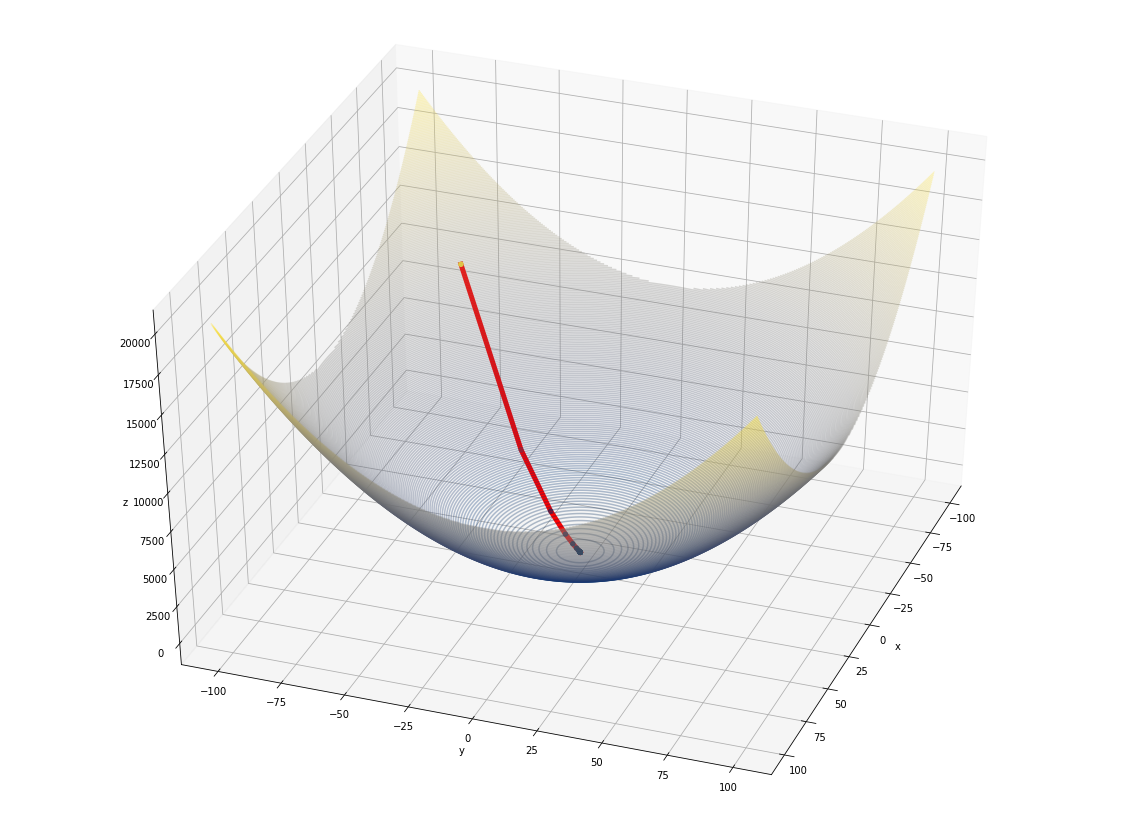

In [15]:
fig3 = plt.figure()
ax3 = plt.axes(projection='3d')

x = np.linspace(-100, 100, 300)
y = np.linspace(-100, 100, 300)
X, Y = np.meshgrid(x, y)
Z = fconvex(X, Y)

ax3.contour3D(X, Y, Z, 250, cmap='cividis', alpha=0.3)
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('z')


xdata = x_hist_1[:, 0]
ydata = x_hist_1[:, 1]
zdata = fconvex(xdata, ydata)
ax3.scatter3D(xdata, ydata, zdata, c=zdata, cmap='cividis')
ax3.plot3D(xdata, ydata, zdata, 'red', lw=5)
ax3.view_init(40, 20);

Here, we have coded our own Gradient Descent, using its mathematical formulation. We could use another method and code it by hand, and while this is certainly quite interesting, we would reinvent the wheel doing so. An easier solution is to use the code already written and optimized by other people, that is present in the library Scipy.

In [16]:
from scipy.optimize import minimize
#BFGS is a 'quasi-Newton' method, that uses an approximation of the Hessian instead of computing it exactly as we have done before.

minimize(f, x0=[12, 12], method="BFGS")

      fun: 1.173795964081817e-12
 hess_inv: array([[ 0.74999998, -0.25000002],
       [-0.25000002,  0.74999998]])
      jac: array([1.54708651e-06, 1.54708651e-06])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 2
     njev: 4
   status: 0
  success: True
        x: array([7.66092672e-07, 7.66092672e-07])

The Gradient Descent we have coded manually here is great, but it requires an explicit expression for the Hessian. While it wasn't an issue with a simple function, it can lead to issues, because derivatives are computationally expensive, be it for the human who derives them or for the computer. Most methods developed attempt to alleviate this issue by only computing the Gradient (first degree derivative) and approximating the Hessian by another method. In particular, the BFGS method on which the **minimize** function relies approximates the Hessian by recursion.

## Coordinate Descent:

Instead of looking at all variables, why not look at them one after another ? This is called coordinate gradient descent. As you will see, there is no need to use the Hessian here either. Coordinate descent is a simple method, perhaps too simple. Typically, it risks not converging to a solution if the objective function is not smooth.


<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/e/e3/Coordinate_descent.svg/1024px-Coordinate_descent.svg.png width="500">

In [17]:
def coordinate_descent(x_1, λ=0.5):
    error = 1000
    tol = 1e-8
    x_hist = []
    
    
    x = x_1
    coord = 0
    
    while error > tol:
        
        
        gradient_k = g(x)
        g_basis = np.zeros(x_1.shape[0])
        g_basis[coord] = gradient_k[coord]
        
        x = x - λ*g_basis
        x_hist.append(x)
        error = max(abs(gradient_k))
        
        if coord < x_1.shape[0]-1: #go to the next coordinate
            coord+=1
        else:
            coord=0 #if we're at the last coordinate already, go back to the first coordinate
            
    
    x_hist_np = np.empty((len(x_hist), x_1.shape[0]))
    for iter_index in range(len(x_hist)):
        x_hist_np[iter_index, :] = x_hist[iter_index]
    return x, x_hist_np

In [18]:
x_hist_2 = coordinate_descent(np.array([-100, -100]), λ=0.2)[1]

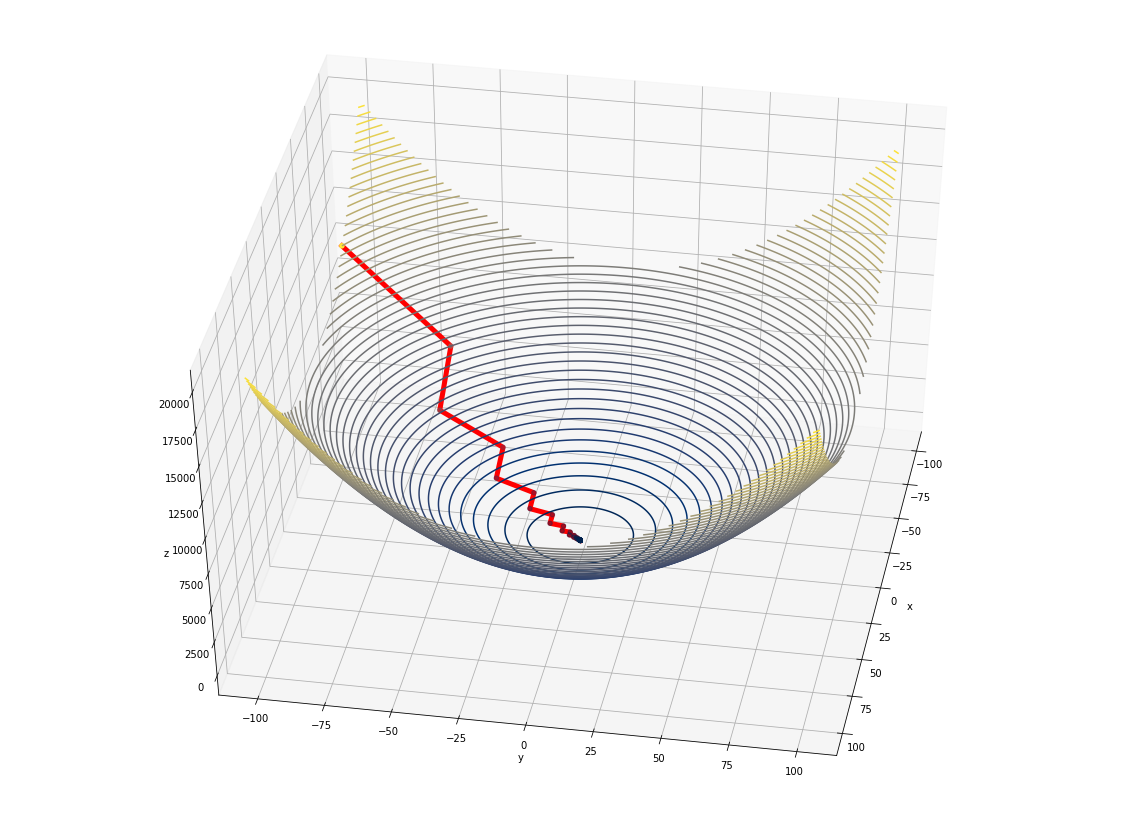

In [19]:
fig4 = plt.figure()
ax4 = plt.axes(projection='3d')

x = np.linspace(-100, 100, 300)
y = np.linspace(-100, 100, 300)
X, Y = np.meshgrid(x, y)
Z = fconvex(X, Y)

ax4.contour3D(X, Y, Z, 50, cmap='cividis')
ax4.set_xlabel('x')
ax4.set_ylabel('y')
ax4.set_zlabel('z')


xdata = x_hist_2[:, 0]
ydata = x_hist_2[:, 1]
zdata = fconvex(xdata, ydata)
ax4.scatter3D(xdata, ydata, zdata, c=zdata, cmap='cividis')
ax4.plot3D(xdata, ydata, zdata, 'red', lw=5)
ax4.view_init(45, 10);

# When/how do these methods fail ?

Unfortunately (but expectedly), gradient descent is not guaranteed to succeed. The biggest issues you may encounter are non convexity and dimensionality. 

## Nonconvexity 
A simple gradient method like N-R can get stuck on a local minimum or just any flat area, and ignore the global minimum. For example, let us check the following bivariate function:

\begin{align}
f(x, y) &= 3(1-x)^2 \exp\{-x^2 - (y+1)^2\} - 10(\frac{x}{5} - x^3 - y^5) \exp\{ -x^2 - y^2 \} - \frac{1}{3}\exp\{ -(x+1)^2 - y^2 \}
\end{align}

In [20]:
def f_nonconvex_g(x, y):
    return 3*(1-x)**2 * np.exp(-x**2 - (y-1)**2) - 10*(x/5 - x**3 - y**5)*np.exp(-x**2 -y**2) - 1/3*(np.exp(-(x+1)**2 - y**2))

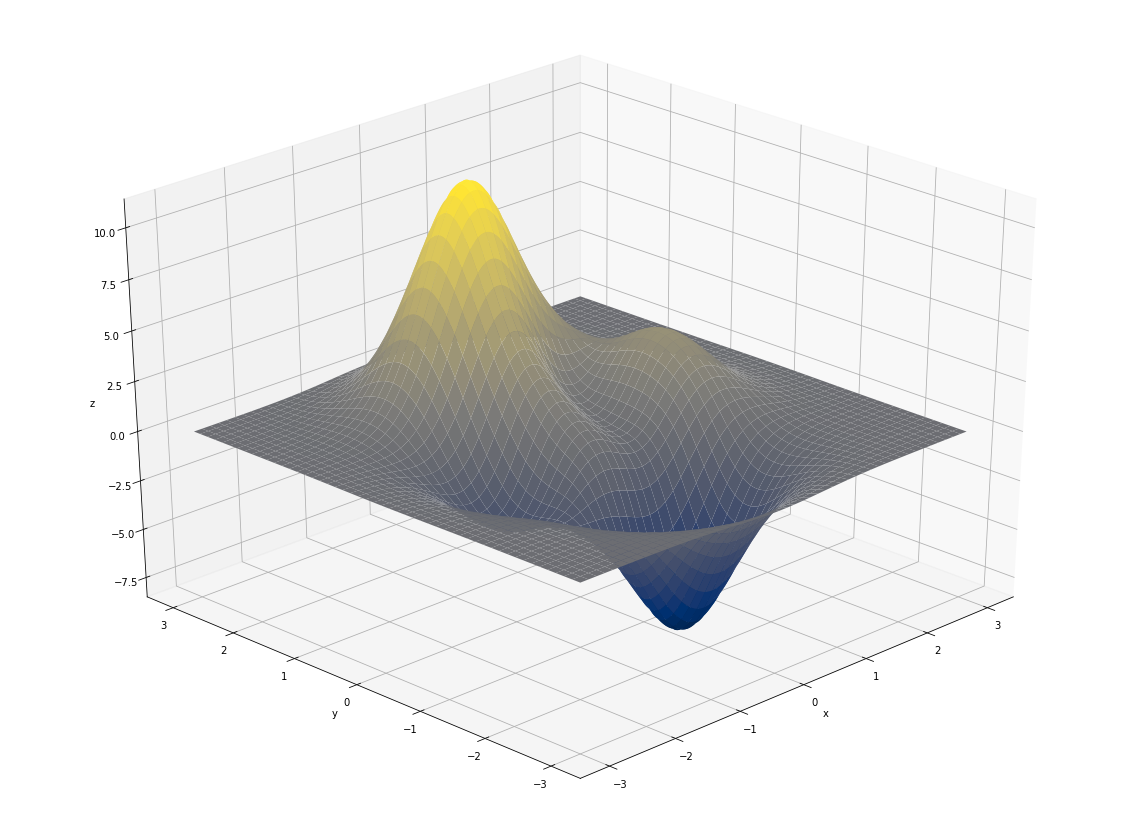

In [21]:
fig5 = plt.figure()
ax5 = plt.axes(projection='3d')

x = np.linspace(-3, 3, 300)
y = np.linspace(-3, 3, 300)
X, Y = np.meshgrid(x, y)
Z = f_nonconvex_g(X, Y)

#ax5.contour3D(X, Y, Z, 250, cmap='viridis', alpha=0.3)
ax5.plot_surface(X, Y, Z, cmap='cividis', antialiased=True)
ax5.set_xlabel('x')
ax5.set_ylabel('y')
ax5.set_zlabel('z')


#xdata = x_hist_1[:, 0]
#ydata = x_hist_1[:, 1]
#zdata = fconvex(xdata, ydata)
#ax5.scatter3D(xdata, ydata, zdata, c=zdata, cmap='cividis')
#ax5.plot3D(xdata, ydata, zdata, 'red', lw=5)
ax5.view_init(30, 225);

Clearly, that function is not convex. Let us check what happens if we try to run gradient descent. Instead of building a specific function for gradient descent, the code below is a cleaner implementation of the Newton-Raphson minimization method that will work for any simple function.

In [22]:
def num_gradient(f, x):
    partial_derivatives_vector=np.empty(x.shape[0])
    for index in range(x.shape[0]):
        e_ind = np.zeros(x.shape[0])
        e_ind[index] = 1.0
        h = 1e-5
        partial_derivatives_vector[index] = (f(x + e_ind*h) - f(x - e_ind*h))/(2*h)
    return partial_derivatives_vector

def num_hessian(f, x):
    hessian = np.empty((x.shape[0], x.shape[0]))
    for index in range(x.shape[0]):
          for jindex in range(x.shape[0]):
                e_ind = np.zeros(x.shape[0])
                e_ind[jindex] = 1.0
                h = 1e-5
                hessian[index, jindex] = (num_gradient(f, x + e_ind*h)[index] - num_gradient(f, x - e_ind*h)[index])/(2*h)
    return hessian

def gradient_descent(f, x_1, step=1, tol=1e-5, verbose=False):
    """Implements Gradient Descent using the Newton-Raphson algorithm. Gradients and Hessians are computed numerically.\n
    x_1: starting point of the iterative process\n
    X: Explanatory variables\n
    y: Dependent variable"""
    
    
    error = 1e6
    x_hist = []
    maxiter=100
    
    x = x_1
    n_iter=1
    
    while error > tol:
        g_k = num_gradient(f, x)
        if verbose==True:
            print(f'iteration: {n_iter}, x_hat: {np.round(x, 3)}, gradient: {np.round(g_k, 3)}, value: {np.round(f(x), 3)}')
        
        H_k = num_hessian(f, x)
        try:
            A_k = -np.linalg.inv(H_k)
        except:
            A_k = np.random.normal(0, 1, size=x.shape[0])*np.identity(x.shape[0])
            print("ERROR: Failure to invert the Hessian")
            
        x = x + step*A_k@g_k
        x_hist.append(x)
        error = max(abs(g_k))
        n_iter+=1
    return x, x_hist

In [23]:
def f_nonconvex(X):
    x = X[0]
    y = X[1]
    return 3*(1-x)**2 * np.exp(-x**2 - (y-1)**2) - 10*(x/5 - x**3 - y**5)*np.exp(-x**2 -y**2) - 1/3*(np.exp(-(x+1)**2 - y**2))

In [24]:
x_star, x_hist = gradient_descent(f_nonconvex, np.array([0, 1]), step=0.1)
x_star #true minimum

array([ 0.00936299, -1.58062483])

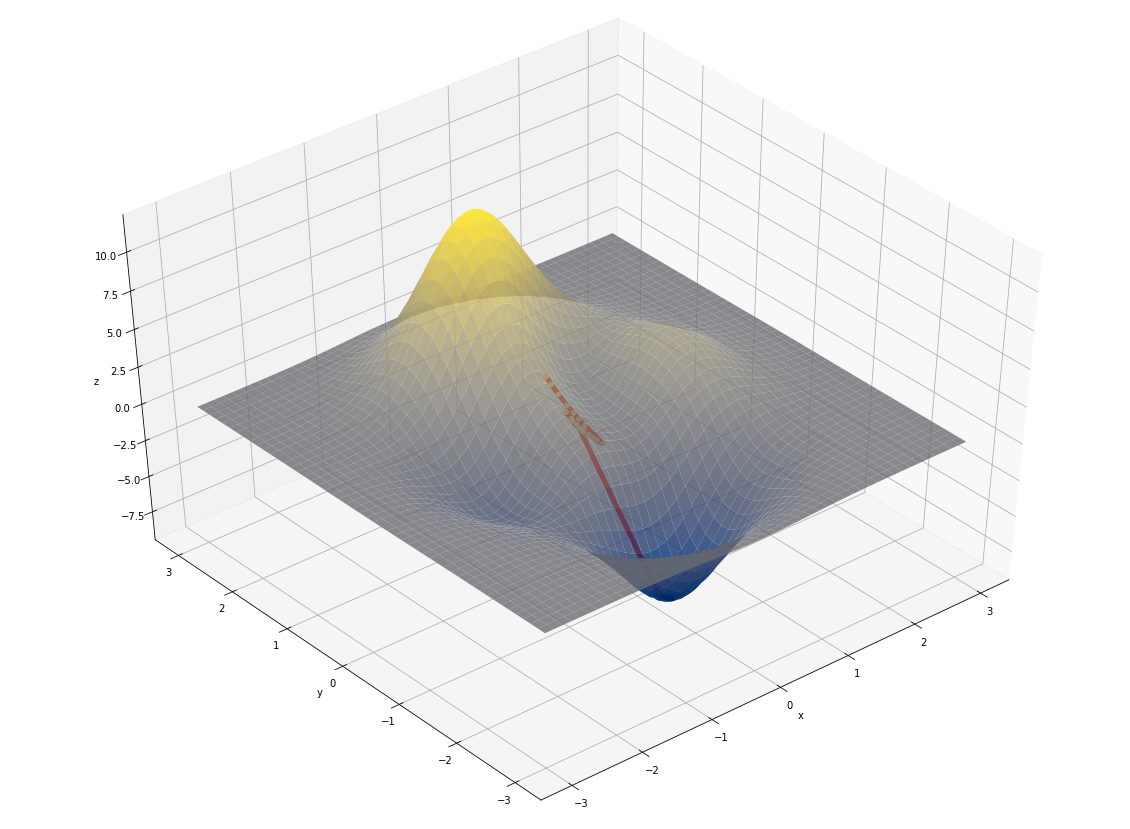

In [27]:
fig6 = plt.figure()
ax6 = plt.axes(projection='3d')

x = np.linspace(-3, 3, 300)
y = np.linspace(-3, 3, 300)
X, Y = np.meshgrid(x, y)
Z = f_nonconvex_g(X, Y)

#ax5.contour3D(X, Y, Z, 250, cmap='viridis', alpha=0.3)
ax6.plot_surface(X, Y, Z, cmap='cividis', antialiased=True, alpha=0.8)
ax6.set_xlabel('x')
ax6.set_ylabel('y')
ax6.set_zlabel('z')

x_hist_nc_lucky = np.array(gradient_descent(f_nonconvex, np.array([0, 1]), step=0.1)[1]) #we were lucky to pick a starting point that leads us to the global min
x_hist_nc = x_hist_nc_lucky

#x_hist_nc_unlucky = np.array(gradient_descent(f_nonconvex, np.array([-1.5, 0]), step=0.1)[1]) #we got stuck in a local minimum
#x_hist_nc = x_hist_nc_unlucky



xdata = x_hist_nc[:, 0]
ydata = x_hist_nc[:, 1]
Xdata = np.vstack([xdata, ydata])
zdata = f_nonconvex(Xdata)
ax6.scatter3D(xdata, ydata, zdata, c=zdata, cmap='cividis')
ax6.plot3D(xdata, ydata, zdata, 'red', lw=5)
ax6.view_init(45, 230);

In [28]:
minimize(f_nonconvex, x0=(-1.5, 0)) #scipy BFGS gets fooled as well when we start from the unlucky x0 and get in the local minimum.
                                    #That's way convexity is an absolute requirement.

      fun: -3.051010724588495
 hess_inv: array([[ 0.07087732, -0.01838886],
       [-0.01838886,  0.11539952]])
      jac: array([-8.94069672e-08,  2.32458115e-06])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([-1.34667724, -0.20773589])

## Computational weight

In the Newton-Raphson method we have coded, there are computationally expensive steps. Most importantly, computing and inversing the hessian. For $k$ variables, we need to compute $k^2$ second-order partial derivatives which compose the Hessian. Each second-order partial derivative involves evaluating the function four times. If the function is simple, all is good. If the function involves many variables, a large statistical sample, or computationally expensive steps, Newton-Raphson can take ages to converge. Solutions can come from more clever algorithms, that rely on an approximation of the Hessian inverse. If we do statistics or machine learning, which can typically rely on Hessian approximation (l-BFGS) or stochastic approximation.

### (Imperfect) solutions:
* Stochastic Gradient Descent (and its [extensions](https://en.wikipedia.org/wiki/Stochastic_gradient_descent))
* [Particle Swarm Optimization](https://en.wikipedia.org/wiki/Particle_swarm_optimization)
* [Simulated Annealing](https://en.wikipedia.org/wiki/Simulated_annealing): you start at a high "temperature", where you allow the candidates to move upwards with a high probability. Then, you progressively decrease "temperature" and make it so that the candidates can only be found by going downwards. Hopefully, you overcome local minima and reach the global minimum.

All of these methods can perform better than NR and give you a better chance of reaching the global minimum, but none is guaranteed to give you a global minimum in reasonable time.